## 集成学习

#### 如何根据数据和需求选择合适的算法？

![image](https://mmbiz.qpic.cn/mmbiz_png/1ZB7qssGybtcTCvJxMandNIjIESNRo690GPBrQfnhFPsRevhN50psHLfIMm8EC2Ntb07WeHuStwh1oE7IYV0eg/640?wx_fmt=png&tp=webp&wxfrom=5&wx_lazy=1&wx_co=1)

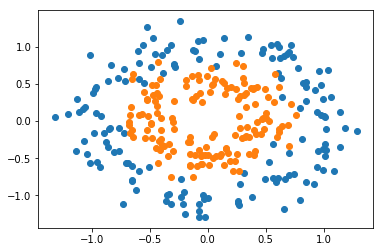

In [2]:
# 引入一些必要的包和数据，并将数据可视化
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# 引入数据，设置标准差为0.15，设置随机种子
X, y = make_circles(n_samples=300, noise=0.15, factor=0.5, random_state=233)

# 显示数据
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

#### 分离训练机和测试集，实例化一个KNN模型，训练并输出精度

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=233)

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
print('KNN Accuracy: ', knn_clf.score(X_test, y_test))

KNN Accuracy:  0.92


#### 实例化一个逻辑回归模型，训练并输出精度

In [5]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
print('LogisticRegression Accuracy: ', log_clf.score(X_test, y_test))

LogisticRegression Accuracy:  0.3333333333333333


#### 实例化一个支持向量机模型，训练并输出精度

In [6]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)
print('SVM Accuracy: ', svm_clf.score(X_test, y_test))

SVM Accuracy:  0.96


#### 实例化一个决策树模型，训练并输出精度

In [7]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
print('DecisionTree Accuracy: ', dt_clf.score(X_test, y_test))

DecisionTree Accuracy:  0.92


#### 传入上述的各个机器学习模型，实例化一个VotingClassifier模型，训练并输出精度

In [8]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('knn', KNeighborsClassifier()),
    ('ligistic', LogisticRegression()),
    ('SVM', SVC()),
    ('decision tree', DecisionTreeClassifier())
],
                             voting='hard')

voting_clf.fit(X_train, y_train)
print('VotingClassifier Accuracy: ', voting_clf.score(X_test, y_test))

VotingClassifier Accuracy:  0.92


d:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


#### 集成后精度反而下降，原因是**voting='hard'**严格遵循少数服从多数原则

#### 随机森林
超参数与决策树类似，但有两个例外：

参数 | 说明
:-: | :-
**bootstrap** | 取'true'或'false'，表示在划分训练数据集时是否采用放回取样
**oob_score** | 采用放回取样时，构建完整的随机森林会有约33%的数据没有被取到过，所以当oob_score取'true'时，不再将数据及划分为训练集和测试集，直接取未使用过的数据来验证模型的准确率

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
            n_estimators=500,  # 确定树的规模，500棵
            max_depth=6,       # 确定每棵树最大深度
            bootstrap=True,    # 有放回取样
            oob_score=True     # 使用out of bag的数据测试模型
)

# rf_clf.fit(X_train, y_train)，直接使用全部数据
rf_clf.fit(X, y)
print('Random Forest Accuracy: ', rf_clf.oob_score_)

Random Forest Accuracy:  0.92


#### Extremely Randomized Trees(ERT)
**对于特征集X，随机森林只是在行上随机，ERT在行和列上都随机**

分类器 | 说明
:-: | :-
随机森林 | 在构建数据子集时对**样本的选择**进行随机抽取
ERT | 对**样本的选择**和**特征**进行随机抽取，即**采用部分特征**

In [12]:
from sklearn.ensemble import ExtraTreesClassifier

et_clf = ExtraTreesClassifier(
    n_estimators=500, max_depth=5, bootstrap=True, oob_score=True)

et_clf.fit(X, y)
print('Extremely Randomized Trees Accuracy: ', et_clf.oob_score_)

Extremely Randomized Trees Accuracy:  0.9433333333333334


#### Boosting和Bagging
方法 | 说明
:-: | :-
**Boosting** | 从初始训练集训练出一个基学习器，根据及学习器的表现队训练样本分布进行调整，更关注错分类的样本,然后基于调整后的样本分布训练下一个基学习器，如此重复直至学到T个基学习器，最后将T个基学习器进行加权结合，代表方法**AdaBoost**
**Bagging** | 基于bootstrap采样，采样出T个含m个训练样本的采样集，基于每个采样集训练一个基学习器，再将基学习器进行结合(分类任务采用投票法，回归任务采用平均法，同样票数则随机选取或考察置信度)

**AdaBoost**: 提高被前一轮弱分类器错误分类样本的权值，降低被正确分类样本的权值；采用**'加权多数表决'** 对弱分类器组合，加大分类误差率小的弱分类器的权值，减小分类误差率大的弱分类器的权值

In [13]:
from sklearn.ensemble import AdaBoostClassifier

adab_clf = AdaBoostClassifier(
                DecisionTreeClassifier(),
                n_estimators=500,
                learning_rate=0.3)

adab_clf.fit(X_train, y_train)
print('AdaBoost Accuracy: ', adab_clf.score(X_test, y_test))

AdaBoost Accuracy:  0.8933333333333333
